In [25]:
import pandas as pd
import numpy as np
# rejected = pd.read_csv("Lending_Club_Rejected_2014_2018.csv")
accepted = pd.read_csv("Lending_Club_Accepted_2014_2018.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
libor_14_to_18 = pd.read_csv("LIBOR14to18.csv")
libor_quarterly = libor_14_to_18.groupby(np.arange(len(libor_14_to_18))//3).mean()
libor_quarterly = libor_quarterly[libor_quarterly.columns[1]].to_numpy()
print(libor_quarterly)

[0.23596667 0.2281     0.23433333 0.23666667 0.26036667 0.27943333
 0.31433333 0.41056667 0.62466667 0.64336667 0.78573333 0.9215
 1.0679     1.20246667 1.31503333 1.46826667 1.92883333 2.33806667
 2.33726667 2.63333333]


In [30]:
def modify_date(input_date): #Oct-2014 >>> 201410 in str
    input_year = input_date[-4:]
    input_month = input_date[0:3]
    month_dict = {"Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", 
    "Jun": "06", "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"}
    month = month_dict[input_month]
    return input_year + month

trimmed = accepted[["int_rate", "issue_d", "term"]]
def trim_func(str):
    return str[0:3]
trimmed["int_index"] = trimmed['int_rate']*(trimmed['term'].apply(trim_func).astype("float"))
trimmed_twice = trimmed[["int_index", "issue_d"]]
trimmed_twice.issue_d = trimmed_twice["issue_d"].apply(modify_date)
trimmed_twice.sort_values(by=['issue_d'])
int_index_monthly = trimmed_twice.groupby(by=['issue_d']).mean()
int_index_quarterly = int_index_monthly.groupby(np.arange(len(int_index_monthly))//3).mean()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
trimmed_twice_rate = accepted[["int_rate", "issue_d"]]
trimmed_twice_rate.issue_d = trimmed_twice_rate["issue_d"].apply(modify_date)
trimmed_twice_rate.sort_values(by=['issue_d'])
int_rate_monthly = trimmed_twice_rate.groupby(by=['issue_d']).mean()
int_rate_quarterly = int_rate_monthly.groupby(np.arange(len(int_rate_monthly))//3).mean()
print(int_rate_quarterly)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


     int_rate
0   14.325746
1   14.068590
2   13.734749
3   13.032660
4   12.850765
5   12.766859
6   12.651343
7   12.243646
8   12.454626
9   12.480911
10  13.732961
11  13.650170
12  13.379060
13  13.285375
14  13.475436
15  12.880015
16  12.425467
17  12.559360
18  12.949836
19  12.937414


In [57]:
trimmed_twice_term = accepted[["term", "issue_d"]]
trimmed_twice_term.issue_d = trimmed_twice_term["issue_d"].apply(modify_date)
trimmed_twice_term.term = trimmed_twice_term["term"].apply(trim_func).astype("float")
trimmed_twice_term.sort_values(by=['issue_d'])
term_monthly = trimmed_twice_term.groupby(by=['issue_d']).mean()
term_quarterly = term_monthly.groupby(np.arange(len(term_monthly))//3).mean()
print(term_quarterly)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


         term
0   42.744987
1   43.585880
2   43.348467
3   43.891297
4   43.894939
5   43.912895
6   44.048889
7   43.678210
8   42.819339
9   41.719150
10  42.089061
11  41.710336
12  42.054480
13  42.442077
14  42.764982
15  43.279291
16  43.222453
17  43.207219
18  43.241582
19  43.519894


In [29]:
print(int_index_quarterly)
print(libor_quarterly)

     int_index
0   634.931619
1   636.595277
2   617.629025
3   591.556549
4   584.850294
5   582.085088
6   579.327281
7   555.800331
8   554.322478
9   537.396282
10  598.465815
11  590.332114
12  582.069067
13  582.740172
14  595.684441
15  577.024133
16  556.773357
17  562.700944
18  577.944266
19  577.316829
[0.23596667 0.2281     0.23433333 0.23666667 0.26036667 0.27943333
 0.31433333 0.41056667 0.62466667 0.64336667 0.78573333 0.9215
 1.0679     1.20246667 1.31503333 1.46826667 1.92883333 2.33806667
 2.33726667 2.63333333]


In [93]:
cash_flow = pd.read_csv("LC_quarterly_cash-flow.csv")
def rem_comma(str):
    str = str.replace(',','')
    return str
cash_flow = np.array((cash_flow.iloc[-1, -24:-4]).apply(rem_comma)).astype(float).reshape((20, 1))
cash_flow = cash_flow[::-1]
term_quarterly = np.array(term_quarterly).reshape((20, 1)).astype(float)
libor_quarterly = np.array(libor_quarterly).reshape((20, 1)).astype(float)
int_rate_quarterly = np.array(int_rate_quarterly).reshape((20, 1)).astype(float)
print(term_quarterly.shape, libor_quarterly.shape, cash_flow.shape)

(20, 1) (20, 1) (20, 1)


In [97]:
from sklearn.linear_model import LinearRegression
X = np.hstack((term_quarterly, libor_quarterly))
X = np.hstack((cash_flow, X))
# X = cash_flow, term_quarterly, libor_quarterly
y = int_rate_quarterly
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_[0])
print(X@reg.coef_.T+reg.intercept_[0] - y)

0.18679573971752017
[[-6.04144965e-10 -2.78393273e-01 -2.93125447e-01]]
25.327132909076617
[[-9.76813505e-01]
 [-9.40925494e-01]
 [-5.48848245e-01]
 [ 6.55517332e-04]
 [ 1.79837954e-01]
 [ 2.49952370e-01]
 [ 3.07651597e-01]
 [ 7.98658067e-01]
 [ 7.69112859e-01]
 [ 1.05995048e+00]
 [-3.42163620e-01]
 [-2.02306761e-01]
 [-5.75212681e-02]
 [-1.10992924e-01]
 [-3.53342223e-01]
 [ 2.35614086e-01]
 [ 3.03380061e-01]
 [ 1.97586199e-01]
 [-3.08414397e-01]
 [-2.61070750e-01]]


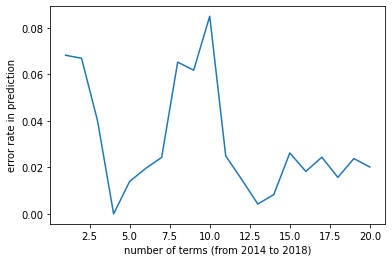

In [96]:
from matplotlib import pyplot as plt 
plt.xlabel("number of terms (from 2014 to 2018)") 
plt.ylabel("error rate in prediction") 
x = np.array([i for i in range (1, 21)])
y_new = abs((X@reg.coef_.T+reg.intercept_[0] - y)/y)
plt.plot(x, y_new)
plt.show()